In [1]:
%matplotlib inline
import ppplot
import matplotlib.pyplot as mpl

In [2]:
ppplot.changefont(16)

In [3]:
dayperyear = 24430.
secondperday = 38052.
outputfreq = 1. #50. #500.
deltafile = outputfreq / dayperyear
print deltafile

4.09332787556e-05


In [4]:
import numpy as np
eps = np.loadtxt("/home/aspiga/work/my_pics/saturn/2018_05_analysis/aam_epsilon.txt")
dip = np.loadtxt("/home/aspiga/work/my_pics/saturn/2018_05_analysis/aam_dissip_plus.txt")
dim = np.loadtxt("/home/aspiga/work/my_pics/saturn/2018_05_analysis/aam_dissip_moins.txt")
mas = np.loadtxt("/home/aspiga/work/my_pics/saturn/2018_05_analysis/aam_mass.txt")
win = np.loadtxt("/home/aspiga/work/my_pics/saturn/2018_05_analysis/aam_vel.txt")
dyp = np.loadtxt("/home/aspiga/work/my_pics/saturn/2018_05_analysis/aam_dyn_plus.txt")
dym = np.loadtxt("/home/aspiga/work/my_pics/saturn/2018_05_analysis/aam_dyn_moins.txt")
dyn = np.loadtxt("/home/aspiga/work/my_pics/saturn/2018_05_analysis/aam_dyn.txt")

Include less points, plots are the same but less heavier

In [5]:
stride = 20

calculate total AAM and normalize by initial value. plot.
see the establishment of dynamical equilibrium (two periods can be defined: spin-up and steady-state)
only 0.4% of total AAM is lost
very good especially given studies on exoplanets (see intercomparisons)

5.24400003376e+32
!! WARNING !! dummy coordinates on x axis
**** Saving file in png format... Please wait.
**** Saving file in pdf format... Please wait.


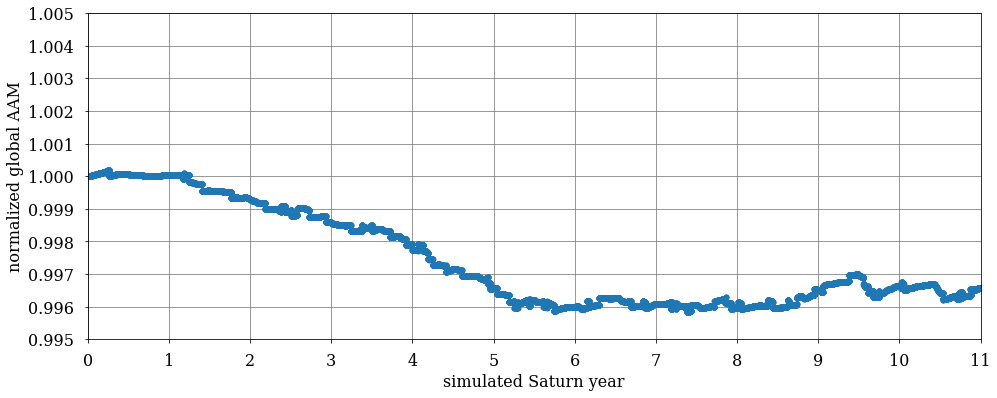

In [6]:
tot = mas + win
#norm = 100.*(tot - tot[0])/tot[0]
print tot[0]
norm = tot/tot[0]
zefig = ppplot.figuref(x=16,y=6)
pl = ppplot.plot1d(fig=zefig)
pl.f = norm[::stride]
pl.fmt = "%.3f"
pl.xcoeff = deltafile*stride
pl.nxticks = 11
pl.marker = "."
pl.linestyle = ""
pl.ylabel = r'normalized global AAM'
pl.xlabel = "simulated Saturn year"
pl.ymin = 1.005
pl.ymax = 0.995
pl.xmin = 0
pl.xmax = 11
pl.nxticks = 11
pl.make()
ppplot.save(filename="aam",mode="png",res=300)
ppplot.save(filename="aam",mode="pdf")

en fait si on veut dMw/dt il faut prendre dyn-dissip. NON: dyn+dissip.
dyn in our analysis and not the same as Dy in Lebonnois et al. 2012
dyn in our analysis is [dM/dt]PE

!! WARNING !! dummy coordinates on x axis


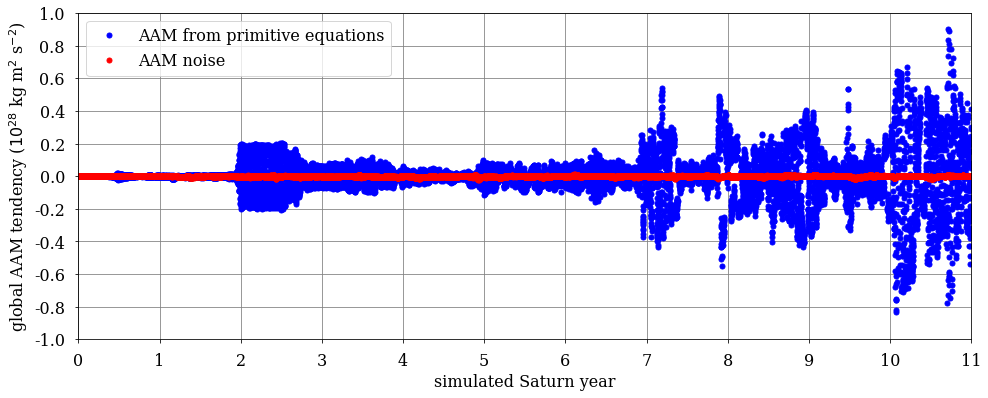

In [8]:
zefig = ppplot.figuref(x=16,y=6)
pl = ppplot.plot1d(fig=zefig)
pl.f = dyn[::stride]*1e-28
pl.fmt = "%.1f"
pl.xcoeff = deltafile*stride
pl.xlabel = "simulated Saturn year"
pl.nxticks = 11
pl.marker = "."
pl.linestyle = ""
pl.ylabel = r'global AAM tendency ($10^{28}$ kg m$^2$ s$^{-2}$)'
pl.ymin = +1
pl.ymax = -1
pl.legend = "AAM from primitive equations"
pl.color = "b"
pl.xmin = 0
pl.xmax = 11
pl.nxticks = 11
pl.make()
pl.f = eps[::stride]*1e-28
pl.legend = "AAM noise"
pl.color = "r"
pl.make()
#ppplot.save(filename="aam_cond1",mode="png",res=300)
#ppplot.save(filename="aam_cond1",mode="pdf")

In [9]:
adyn = np.abs(dyn)
aeps = np.abs(eps)
adis = np.abs(dim+dip)
adim = np.abs(dim) 
w = np.where(adyn > 1)
dyn = dyn[w]
eps = eps[w]
adyn = adyn[w]
aeps = aeps[w]
adis = adis[w]
adim = adim[w]

!! WARNING !! dummy coordinates on x axis
**** Saving file in png format... Please wait.
**** Saving file in pdf format... Please wait.
8.33371775516e+26
2.11339014117e+25
1.22646647899e+24
1.47610372699e+25
1.61955300197e+25
-1.77872983276e+25


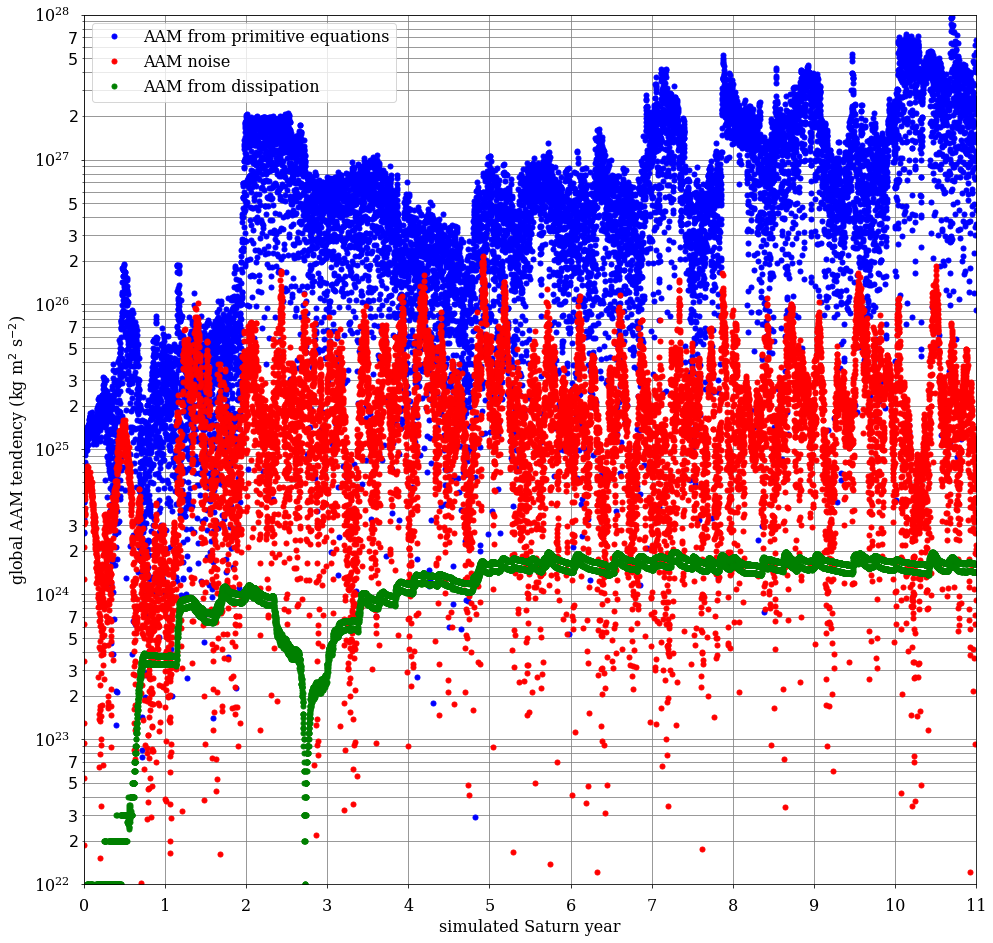

In [10]:
zefig = ppplot.figuref(x=16,y=16)
pl = ppplot.plot1d(fig=zefig)
pl.ymin = 1e22
pl.ymax = 1e28
pl.xmin = 0
pl.xmax = 11
pl.nxticks = 11
pl.f = adyn[::stride]
pl.fmt = "%.1e"
pl.xcoeff = deltafile*stride
pl.xlabel = "simulated Saturn year"
pl.nxticks = 11
pl.marker = "."
pl.linestyle = ""
pl.ylabel = r'global AAM tendency (kg m$^2$ s$^{-2}$)'
pl.logy = True
pl.legend = "AAM from primitive equations"
pl.color = "b"
pl.make()
pl.f = aeps[::stride]
pl.legend = "AAM noise"
pl.color = "r"
pl.make()
pl.f = adis[::stride]
pl.legend = "AAM from dissipation"
pl.color = "g"
pl.make()
pl.f = adim[::stride]
#pl.legend = "AAM from dissipation (only u>0)"
#pl.color = "c"
#pl.make()
ppplot.save(filename="aam_cond2",mode="png",res=300)
ppplot.save(filename="aam_cond2",mode="pdf")


print np.mean(adyn)
print np.mean(aeps)
print np.mean(adis)
print np.mean(adim)
print np.mean(dyp)
print np.mean(dym)


Same result with dyn+ and dyn-, showing that angular momentum does not alter AAM balance